In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


In [36]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
%matplotlib inline

In [37]:
# Load a sample of the data (10%) 
data = pd.read_csv(r'/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv').sample(frac=0.1, random_state=42)

In [38]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


In [57]:
print(data.isnull().sum())


product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


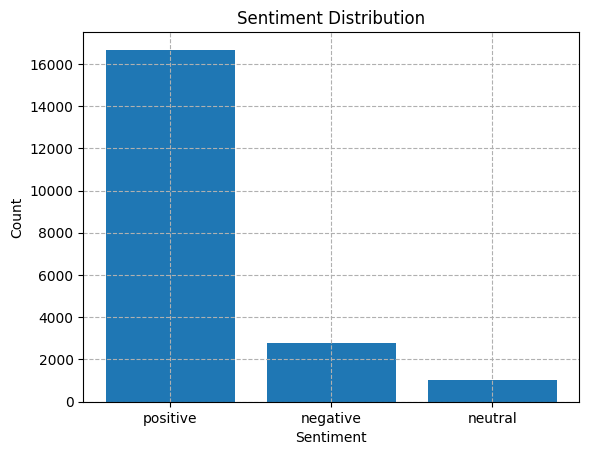

In [39]:
# Visualize the distribution of sentiments 
sentiment_counts = data['Sentiment'].value_counts() 
plt.bar(sentiment_counts.index, sentiment_counts.values) 
plt.title('Sentiment Distribution') 
plt.xlabel('Sentiment') 
plt.ylabel("Count") 
plt.grid(linestyle="--") 
plt.show()

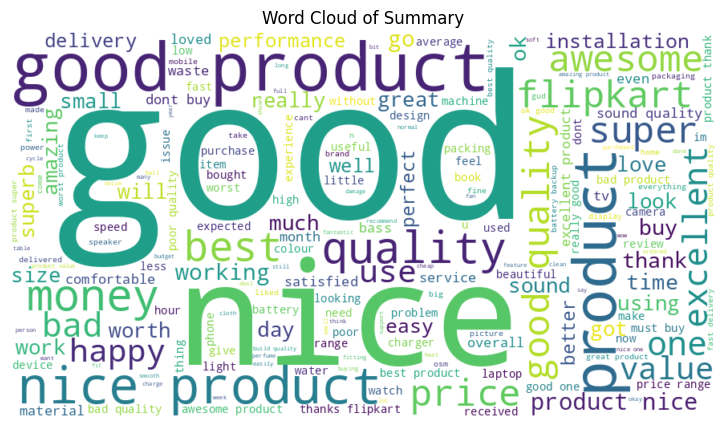

In [40]:
# Generate a word cloud for the 'Summary' column 
text= ' '.join(data["Summary"].dropna()) 
wordcloud = WordCloud (width=880, height=480, background_color='white').generate(text) 
#Display the word cloud 
plt.figure(figsize=(18, 5)) 
plt.imshow(wordcloud, interpolation ='bilinear') 
plt.axis('off') 
plt.title('Word Cloud of Summary') 
plt.show()

In [ ]:
# Extract features from the text data 
data = data.dropna() 
X= data['Summary'] 
y= data['Sentiment'] 

#Train a machine Learning model 
#Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Vectorize the text data 
vectorizer = CountVectorizer() 
X_train_counts = vectorizer.fit_transform(X_train) 
X_test_counts = vectorizer.transform(X_test)

In [ ]:
# Train Multinomial Naive Bayes classifier 
nb_classifier =  MultinomialNB() 
nb_classifier.fit(X_train_counts, y_train)

## Making Predictions And checking accuracy of the model


In [44]:
#Make predictions using Multinomial Naive Bayes 
y_pred_nb = nb_classifier.predict(X_test_counts) 
accuracy_nb = accuracy_score(y_test, y_pred_nb) 
print("Multinomial Naive Bayes Accuracy:", accuracy_nb) 
print("Multinomial Naive Bayes Classification Report:") 
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.896398891966759
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



In [49]:
# Train Random Forest Classifier 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_classifier.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_counts) 
accuracy_rf = accuracy_score(y_test, y_pred_rf) 
print("\nRandom Forest Classifier Accuracy:", accuracy_rf) 
print("Random Forest Classifier Classification Report:") 
print(classification_report(y_test, y_pred_rf)) 


Random Forest Classifier Accuracy: 0.9274238227146815
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



In [55]:
# Make predictions on new data 
# Naives Bayes 
def predict_sentiment_mt(text): 
    text_counts = vectorizer.transform([text]) 
    prediction = nb_classifier.predict(text_counts)[0] 
    return prediction 

#Random Forest 
def predict_sentiment_rf(text): 
    text_counts = vectorizer.transform([text]) 
    prediction = rf_classifier.predict(text_counts)[0] 
    return prediction

In [56]:
input_text = "really good product" 
predicted_sentiment = predict_sentiment_mt(input_text) 
print("Predicted sentiment:",predicted_sentiment)


Predicted sentiment: positive


## Models Performance - Interpretation 
## ➤ Multinomial Naive Bayes Model: 
#### - Accuracy: 89.64% 
#### - Precision for negative sentimelt: 82% 
#### - Recall for negative sentiment: 63% 
#### - F1-score for negative sentiment: 71% 
#### - Precision for neutral sentiment: 78% 
#### - Recall for neutral sentiment: 4% 
#### - F1-score for neutral sentiment: 8% 
#### - Precision for positive sentiment: 90%
#### - Recall for positive sentiment: 99% 
#### - F1-score for positive sentiment: 94%accuracy_score 

### The model performs well in identifying positive sentiment but struggles with neutral sentiment due to low recall and Fl-score. Overall, the weighted average Fl-score is 879%, indicating decent performance across all classes. 



## ➤Random Forest Classifier Model: 
#### - Ассurасу: 92.74% 
#### - Precision for negative sentiment: 85% 
#### - Recall for negative sentiment: 78% 
#### - F1-score for negative sentiment: 82% 
#### - Precision for neutral sentiment: 67% 
#### - Recall for neutral sentiment: 34% 
#### - Fl-score for neutral sentiment: 45% 
#### - Precision for positive sentiment: 95% 
#### - Recall for positive sentiment: 98% 
#### - F1-score for positive sentiment: 96% 

### The model outperforms the Naive Bayes model in all metrics, achieving higher accuracy and better precision, recall, and Fl-score across all classes. 2 shows a similar pattern of struggling with neutral sentiment but performs exceptionally well in identifying positive sentiment.